<a href="https://colab.research.google.com/github/atieh-a/ML.homework/blob/main/hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
from pygam import GAM, s, te
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline

In [15]:
from google.colab import files
data_to_load = files.upload()

Saving airquality.csv to airquality.csv


In [16]:
import io
airquality = pd.read_csv(io.BytesIO(data_to_load['airquality.csv']))
airquality=airquality[['Ozone','Solar.R','Wind','Temp']]
airquality=airquality.dropna()
airquality['TWcp']=airquality['Temp']*airquality['Wind']
airquality['TWrat']=airquality['Temp']/airquality['Wind']
airquality.head()

,Ozone,Solar.R,Wind,Temp,TWcp,TWrat
0,41.0,190.0,7.4,67,495.8,9.054054
1,36.0,118.0,8.0,72,576.0,9.000000
2,12.0,149.0,12.6,74,932.4,5.873016
3,18.0,313.0,11.5,62,713.0,5.391304
6,23.0,299.0,8.6,65,559.0,7.558140


In [17]:
utils = importr('utils')
utils.install_packages('gam')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘iterators’, ‘foreach’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.13.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 288559 bytes (281 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to conso

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f985218b6e0> [RTYPES.NILSXP]

In [18]:
r_gam_lib = importr('gam')
r_gam = r_gam_lib.gam

In [19]:
r_solar = robjects.FloatVector(airquality[["Solar.R"]].values)
r_wind = robjects.FloatVector(airquality[["Wind"]].values)
r_temp = robjects.FloatVector(airquality[["Temp"]].values)
r_twcp = robjects.FloatVector(airquality[["TWcp"]].values)
r_twrat = robjects.FloatVector(airquality[["TWrat"]].values)
r_ozone = robjects.FloatVector(airquality[["Ozone"]].values)

r_fmla = robjects.Formula("Ozone ~ s(Solar.R) + s(Wind) + s(Temp) + s(TWcp) + s(TWrat)")
r_fmla.environment['Ozone'] = r_ozone
r_fmla.environment['Solar.R'] = r_solar
r_fmla.environment['Wind'] = r_wind
r_fmla.environment['Temp'] = r_temp
r_fmla.environment['TWcp'] = r_twcp
r_fmla.environment['TWrat'] = r_twrat

In [20]:
ozone_gam = r_gam(r_fmla)
print(ozone_gam.names)

 [1] "smooth.frame"        "coefficients"        "residuals"          
 [4] "fitted.values"       "effects"             "weights"            
 [7] "rank"                "assign"              "qr"                 
[10] "smooth"              "nl.df"               "df.residual"        
[13] "iter"                "var"                 "additive.predictors"
[16] "R"                   "rank"                "family"             
[19] "deviance"            "aic"                 "null.deviance"      
[22] "iter"                "bf.iter"             "prior.weights"      
[25] "y"                   "df.null"             "nl.chisq"           
[28] "model"               "call"                "formula"            
[31] "terms"               "data"                "offset"             
[34] "control"             "method"              "contrasts"          
[37] "xlevels"            



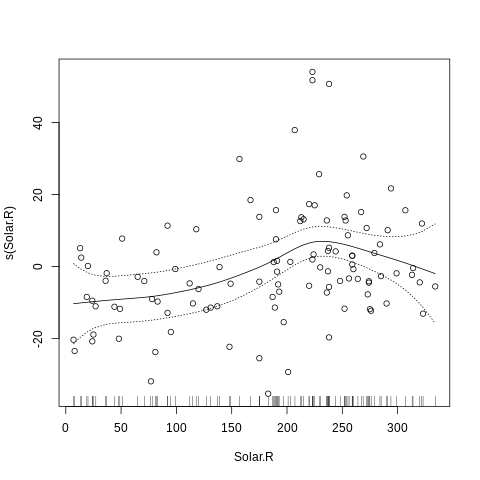

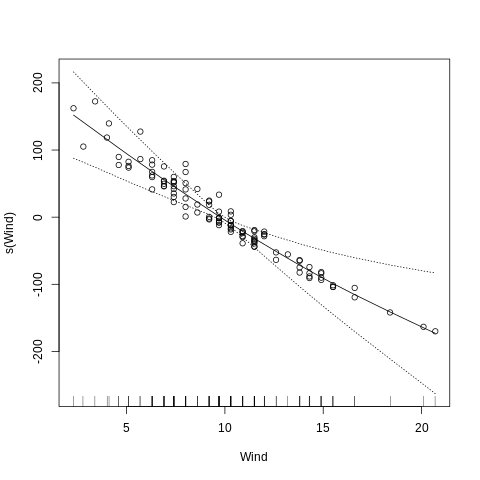

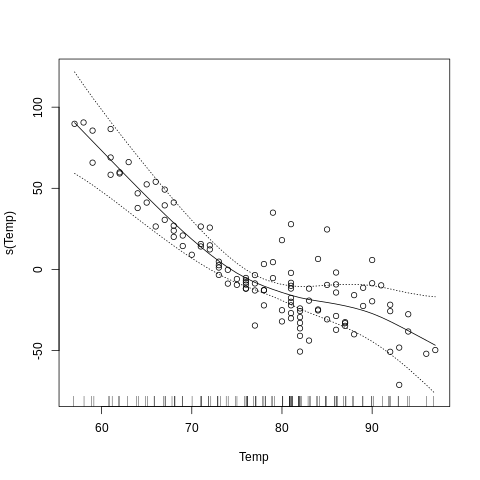

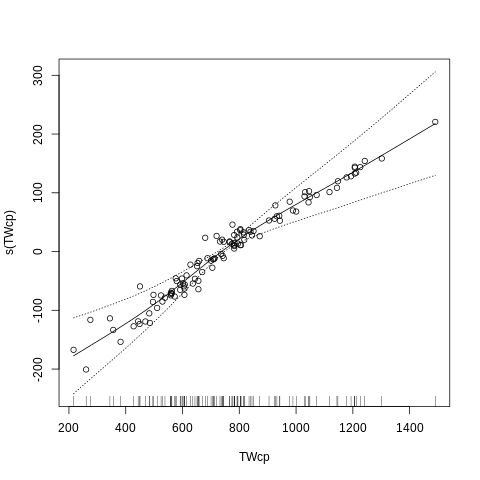

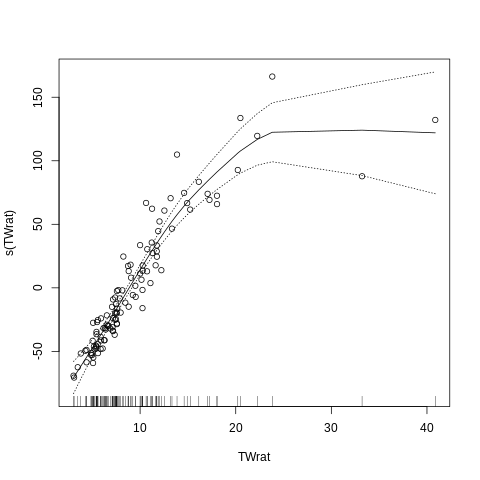

In [21]:
%load_ext rpy2.ipython
%R -i ozone_gam plot(ozone_gam, residuals=TRUE,se=TRUE, scale=20);

In [22]:
X=airquality[['Solar.R','Wind', 'Temp','TWcp','TWrat']]
y=airquality[['Ozone']]
gam=GAM(s(0)+s(1)+s(2)+s(3)+s(4)).fit(X,y)

In [ ]:
gam.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     35.0706
Link Function:                     IdentityLink Log Likelihood:                                  -673.0689
Number of Samples:                          111 AIC:                                              1418.279
                                                AICc:                                             1454.453
                                                GCV:                                              376.5324
                                                Scale:                                            171.1854
                                                Pseudo R-Squared:                                   0.8933
Feature Function                  Lam

C:\Users\arab\AppData\Local\Temp/ipykernel_4940/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [23]:
CV10 = RepeatedKFold(n_splits=10, n_repeats=1, random_state=2928893)
rgam = cross_val_score(gam, X, y, cv=CV10, scoring='neg_mean_squared_error')

In [24]:
print(-rgam)

[ 751.67044169  956.89759998 1850.25905449  584.33886346  927.71909091
 1030.9739183  2746.97203659  783.27399085  620.48639989  939.84977288]


In [25]:
CV10 = RepeatedKFold(n_splits=10, n_repeats=1, random_state=2928893)
airquality['CV'] = np.random.randint(low=0, high=10, size=(airquality.shape[0],))
airquality.head()

,Ozone,Solar.R,Wind,Temp,TWcp,TWrat,CV
0,41.0,190.0,7.4,67,495.8,9.054054,9
1,36.0,118.0,8.0,72,576.0,9.000000,0
2,12.0,149.0,12.6,74,932.4,5.873016,3
3,18.0,313.0,11.5,62,713.0,5.391304,5
6,23.0,299.0,8.6,65,559.0,7.558140,8


In [34]:
random_state=2928893
Stepwize_MSPE= []

for i in range(10):
    airquality_train = airquality.loc[airquality['CV'] != i]
    airquality_test = airquality.loc[airquality['CV'] == i]

    y_train = airquality_train['Ozone']
    X_train = airquality_train.drop(['Ozone','CV'],axis=1)
    y_test = airquality_test['Ozone']
    X_test = airquality_test.drop(['Ozone','CV'],axis=1)
    MLReg = LinearRegression()
    sfs4 = sfs(MLReg, k_features=5, floating=True, verbose=2, scoring='neg_mean_squared_error')
    sfs4.fit(X_train,y_train)
    X_train_sfs4 = sfs4.transform(X_train)
    X_test_sfs4 = sfs4.transform(X_test)
    MLReg.fit(X_train_sfs4, y_train)
    Stepwize_MSPE.append(mean_squared_error(y_test, MLReg.predict(X_test_sfs4)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-02-01 11:17:42] Features: 1/5 -- score: -573.2717434331244[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TypeError: ignored

In [29]:
regModel=LinearRegression()
rls= cross_val_score(regModel, X, y, cv=CV10, scoring='neg_mean_squared_error')

In [33]:
print(Stepwize_MSPE)

[]


In [30]:
print(-rls)

[187.78229175 496.52993873 984.01099911 240.21374537 451.72272419
 507.07694634 925.19401826 137.96315332 262.70295814 160.25936045]


In [31]:
random_state=2928893
Ridge_MSPE = []
LASSO_MSPE = []

for i in range(10):
    airquality_train = airquality.loc[airquality['CV'] != i]
    airquality_test = airquality.loc[airquality['CV'] == i]

    y_train = airquality_train['Ozone']
    X_train = airquality_train.drop(['Ozone','CV'],axis=1)
    y_test = airquality_test['Ozone']
    X_test = airquality_test.drop(['Ozone','CV'],axis=1)
    
     
    X_train_std = StandardScaler().fit(X_train).transform(X_train)
    X_test_std  = StandardScaler().fit(X_train).transform(X_test)


    # Ridge
    LMRidgeCV = RidgeCV(alphas=np.arange(0.5, 10, 0.01), cv=CV10, scoring='neg_mean_squared_error')
    LMRidgeCV.fit(X_train_std, y_train)
    LMRidge = Ridge(alpha = LMRidgeCV.alpha_)
    LMRidge.fit(X_train_std, y_train)
    Ridge_MSPE.append(mean_squared_error(y_test, LMRidge.predict(X_test_std)))

  # LASSO
    LMLassoCV = LassoCV(alphas = np.arange(0.5, 2, 0.01), cv = CV10, max_iter = 1000)
    LMLassoCV.fit(X_train_std, y_train)
    LMLasso = Lasso(max_iter = 10000)
    LMLasso.set_params(alpha=LMLassoCV.alpha_)
    LMLasso.fit(X_train_std, y_train)
    LASSO_MSPE.append(mean_squared_error(y_test, LMLasso.predict(X_test_std)))
    
print(Ridge_MSPE)
print(LASSO_MSPE)

[397.3925169960719, 356.34346329457003, 490.7738348659099, 249.12286422498926, 446.6502855310655, 558.3551186220194, 236.38648056132885, 1432.4941801445266, 146.2947881759872, 181.04903393352282]
[461.2933070787476, 341.93614552399794, 498.7333180993069, 282.8773217607896, 426.3617398507874, 564.0632805593133, 220.0889458372586, 1411.608292594982, 141.96078537610674, 173.74407252166782]


In [35]:
MSPEs=pd.DataFrame({'LS':-rls,
                    'Stepwize':Stepwize_MSPE,
                    'LASSO':LASSO_MSPE,
                    'RIDGE':Ridge_MSPE,
                    'GAM':-rgam})
MSPEs["id"] = MSPEs.index
MSPEs_long = pd.melt(MSPEs, id_vars='id',
                     var_name = 'Model',
                     value_name = 'MSPE',
                     value_vars=['LS','Stepwize','LASSO','RIDGE','GAM'])
print(MSPEs_long.head())
sns.boxplot(y="MSPE", x="Model", orient="v", data=MSPEs_long)

ValueError: ignored

<AxesSubplot:xlabel='Model', ylabel='RMSPE'>

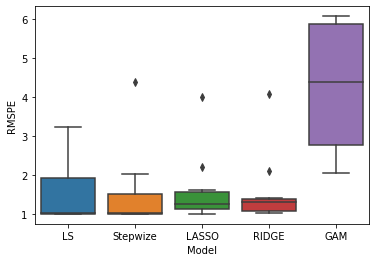

In [ ]:
MSPEs = MSPEs.drop('id', axis=1)
RMSPEs = MSPEs.div(MSPEs.min(axis=1), axis=0)
RMSPEs["id"] = RMSPEs.index
RMSPEs_long = pd.melt(RMSPEs, id_vars='id',
                     var_name = 'Model',
                     value_name = 'RMSPE',
                     value_vars=['LS','Stepwize','LASSO','RIDGE','GAM'])
sns.boxplot(y="RMSPE", x="Model", orient="v", data=RMSPEs_long)
